In [1]:
import hashlib
import math
import random
import numpy as np
import time
#import matplotlib.pyplot as plt

In [9]:
def trail(fhash,  k , l ):
    """
    retourne un triplet (x0, xd, d) 
    fhash: une fonction d'hachage quelconque (md5, sha256)
    k: longueur de la chaine générer
    l: condition d'arret pour le point distingué : les l derniers bits doit etre nul
    """
    x0 = random.getrandbits(k)
    tmp = x0 # c'est un int
    d = 0
    max_it = 2**(l+2)
    mask_k = 2**k - 1
    mask_l = 2**l - 1
    lbyte = math.ceil(l/8)
    while True:
        if d == max_it:
            #print("Risque de cycle")
            return None
        
        if tmp & mask_l == 0:
            xd = tmp
            break
        d += 1
        x = tmp.to_bytes(16, byteorder='big')
        y = fhash(x).digest()
        tmp = int.from_bytes(y, byteorder='big') & mask_k
        #print(d, tmp)
    
    return (x0, xd, d)

In [11]:
print(trail(hashlib.md5, 40, 10))

(639834895848, 250545319936, 294)


In [16]:
def collision_detection(fhash, k, l):
    """
    detecte une seule collision
    retourne le couple de triplet ( (x0,xd,d), (x0',xd,d') )
    """
    dico = {}
    n_trail = 0
    n_failure = 0
    while True: 
        res = trail(fhash, k, l)
        n_trail += 1
        if res == None:
            n_failure += 1
            continue
            
        x0, xd, d = res
        
        if xd in dico:
            print("Collision found after {} trails and {} cycles".format(n_trail, n_failure))
            return ( (x0,xd,d),(dico[xd][0], xd,dico[xd][1])  )  
        
        dico[xd] = (x0, d)

In [18]:
debut = time.time()
print(collision_detection(hashlib.md5, 50, 10))
fin = time.time()
print("Temps : {:.1f}s".format(fin - debut))

Collision found after 43171 trails and 743 cycles
((584593640022247, 587916567120896, 1721), (643689614486903, 587916567120896, 1536))
Temps : 37.5s


In [248]:
def trace_k(fhash, k , l):
    x_taille_graph = np.linspace(10,k,k-10,dtype=int)
    y_temps = np.zeros(k-10)
    tmp= np.zeros(5)
    for i in range(len(x_taille_graph)):
        
        for j in range(5):
            debut = time.time()
            collision_detection(fhash ,x_taille_graph[i] , l)
            fin = time.time()
            tmp[j] = fin-debut
        y_temps[i] = np.mean(tmp)

    plt.plot(x_taille_graph, y_temps, color= np.random.rand(3,), label=fhash.__name__)
    plt.gca().legend().set_visible(True)
    plt.title(fhash.__name__)
    plt.xlabel("k")
    plt.ylabel("temps de calcul (s)")
    plt.show()
    
def trace_l(fhash, k , l):
    x_taille_graph = np.linspace(2,l,l-2,dtype=int)
    y_temps = np.zeros(l-2)
    
    for i in range(len(x_taille_graph)):
        debut = time.time()
        collision_detection(fhash ,k , x_taille_graph[i])
        fin = time.time()
        y_temps[i] = fin-debut

    plt.plot(x_taille_graph, y_temps, color= np.random.rand(3,), label=fhash.__name__)
    plt.gca().legend().set_visible(True)
    plt.title(fhash.__name__)
    plt.xlabel("l")
    plt.ylabel("temps de calcul (s)")
    plt.show()


# Temps d'éxecution en variant l et avec k = 40


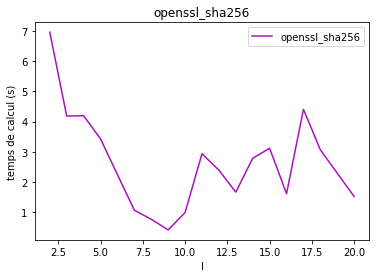
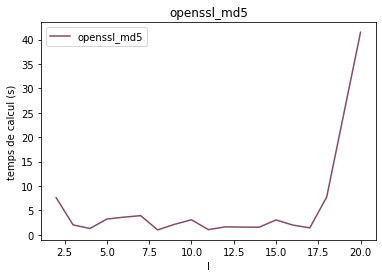


# Temps d'éxecution en variant k et avec l = 10  
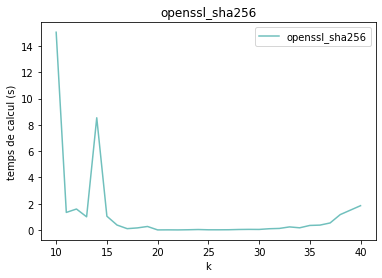
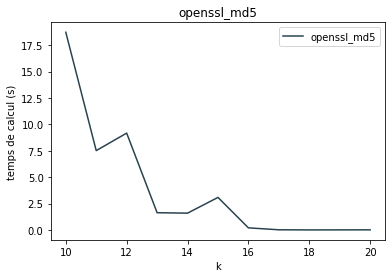

In [ ]:
import subprocess

class OpensslError(Exception):
    pass

def encrypt(plaintext, passphrase, cipher='aes-128-cbc'):
    pass_arg = 'pass:{0}'.format(passphrase)
    args = ['openssl', 'enc', '-' + cipher, '-base64', '-pass', pass_arg, '-pbkdf2']
    if isinstance(plaintext, str):
        plaintext = plaintext.encode('utf-8')
    result = subprocess.run(args, input=plaintext, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    error_message = result.stderr.decode()
    if error_message != '':
        raise OpensslError(error_message)
    return result.stdout.decode()

def decrypt(plaintext, passphrase, cipher='aes-128-cbc'):
    pass_arg = 'pass:{0}'.format(passphrase)
    args = ['openssl', 'enc', '-' + cipher, '-base64', '-pass', pass_arg, '-pbkdf2',"-d"]
    if isinstance(plaintext, str):
        plaintext = plaintext.encode('utf-8')
    result = subprocess.run(args, input=plaintext, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    error_message = result.stderr.decode()
    if error_message != '':
        raise OpensslError(error_message)
    return result.stdout.decode()

In [209]:
m = "test"
k1 = '10101'
k2 = '10001'
print("k1 =",k1, "k2 =" , k2)
c1 = encrypt(m, k1)
print("c1 =", c1)
c2 = encrypt(c1, k2)
print("c2",c2)
print("c1 =",decrypt(c2, k2))



k1 = 10101 k2 = 10001
c1 = U2FsdGVkX1+E4qW3RCjkIjSjFq864BSJN2noga3uMLw=

c2 U2FsdGVkX1889Fi3rtr5uXP8uZ8+WBNCgkoOLOb6tdnBXKSenW0RJZr11yfR0Hn3
GfCKzalooSAn20MjPrKBXQ==

c1 = U2FsdGVkX1+E4qW3RCjkIjSjFq864BSJN2noga3uMLw=



In [ ]:
def remonter (A, B):
    """
    A, B : triplet (x0, xd, d)
    """    

In [250]:
b = random.randint(0,1)
def h ( x, b):
    if b == 0:
        f(x)
    if b == 1:
        g(x)